In [1]:
import copy

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import math

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn import metrics

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [3]:
wearable_data = pd.read_csv('dataset-har-PUC-Rio-ugulino-dataset.csv')

In [4]:
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,162,75,286,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,162,75,286,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,162,75,286,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,162,75,286,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,162,75,286,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [135]:
wearable_data['gender'] = pd.Categorical(wearable_data.gender)
wearable_data['class'] = pd.Categorical(wearable_data['class'])

In [136]:
#Change gender to categorical
wearable_data['gender'] = pd.Categorical(wearable_data.gender)
category_dist = dict(enumerate(wearable_data.gender.cat.categories))
print("The category distrbution for gender attribute {0}".format(category_dist))
wearable_data['gender_cat'] = wearable_data['gender'].cat.codes

The category distrbution for gender attribute {0: 'Man', 1: 'Woman'}


In [137]:
#Change class to categorical
wearable_data['class'] = pd.Categorical(wearable_data['class'])
category_dist = dict(enumerate(wearable_data['class'].cat.categories))
print("The category distrbution for class attribute {0}".format(category_dist))
wearable_data['class_cat'] = wearable_data['class'].cat.codes

The category distrbution for class attribute {0: 'sitting', 1: 'sittingdown', 2: 'standing', 3: 'standingup', 4: 'walking'}


In [138]:
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class,gender_cat,class_cat
0,debora,Woman,46,162,75,286,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting,1,0
1,debora,Woman,46,162,75,286,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting,1,0
2,debora,Woman,46,162,75,286,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting,1,0
3,debora,Woman,46,162,75,286,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting,1,0
4,debora,Woman,46,162,75,286,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting,1,0


## Transformation

In [145]:
X, y = wearable_data.drop(['user', 'gender', 'class', 'class_cat'], axis=1), wearable_data['class_cat']

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
print("First row of the standardized dataset")
print(X_scaled[0])

First row of the standardized dataset
[ 0.58668263 -0.37319438  0.37007877  0.80496163  0.31415835  0.15510422
  0.76541851  0.38261059  0.3415156   0.80934764 -0.23603041 -0.00954964
  0.0414573   0.46047725 -0.51955844  0.95687879  0.79616611]


In [148]:
feature_names = list(X.columns)
target_names = ['4', '3', '2', '1', '0']

# Modeling

## Train - Test Split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [150]:
print('-Dataset Size-')
print('Training dataset Set:', len(X_train))
print('Test dataset Set:', len(X_test))

-Dataset Size-
Training dataset Set: 99379
Test dataset Set: 66254


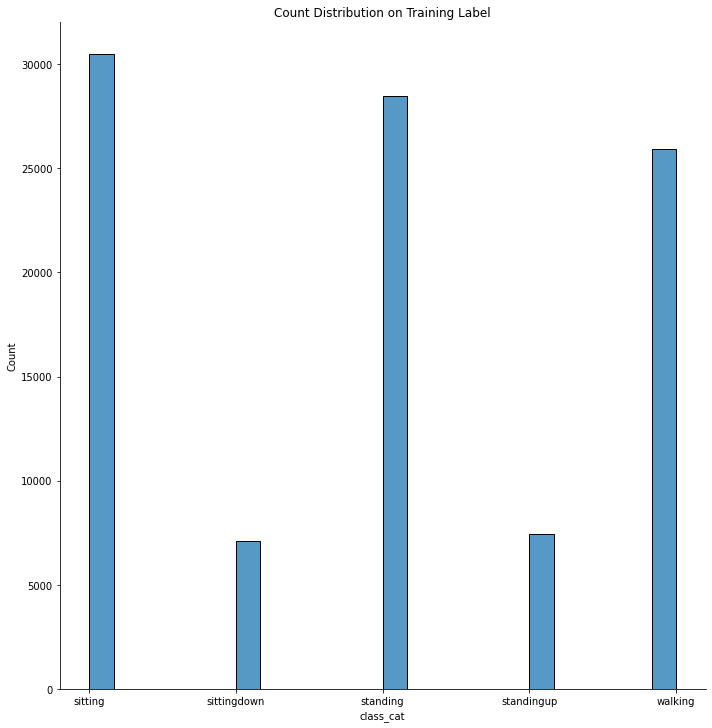

In [151]:
ax = sns.displot(y_train, kde=False, height=10)
plt.xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['sitting', 'sittingdown', 'standing', 'standingup', 'walking'])
plt.title('Count Distribution on Training Label')

plt.show()

## SVM

### Kernel: RBF 

#### Training

In [152]:
svm_rbf = SVC(kernel ='rbf', random_state = 42, C = 1.0, probability=True)

In [153]:
svm_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [154]:
y_train_pred = svm_rbf.predict(X_train)

In [155]:
y_train_acc = metrics.accuracy_score(y_train, y_train_pred)
y_train_pre = metrics.precision_score(y_train, y_train_pred, average='weighted')
y_train_rec = metrics.recall_score(y_train, y_train_pred, average='weighted')

In [156]:
print('SVM (guassian) Accuracy on train dataset:', y_train_acc)
print('SVM (guassian) Precision on train dataset:', y_train_pre)
print('SVM (guassian) Recall on train dataset:', y_train_rec)

SVM (guassian) Accuracy on train dataset: 0.9840006439992353
SVM (guassian) Precision on train dataset: 0.9841790806660687
SVM (guassian) Recall on train dataset: 0.9840006439992353


#### Testing

In [157]:
y_test_preds = svm_rbf.predict(X_test)
y_test_probs = svm_rbf.predict_proba(X_test)

In [158]:
y_test_acc = metrics.accuracy_score(y_test, y_test_preds)
y_test_pre = metrics.precision_score(y_test, y_test_preds, average='weighted')
y_test_rec = metrics.recall_score(y_test, y_test_preds, average='weighted')
y_test_cnf_matrix = metrics.confusion_matrix(y_test, y_test_preds)

In [159]:
print('SVM (guassian) Accuracy on test dataset:', y_test_acc)
print('SVM (guassian) Precision on test dataset:', y_test_pre)
print('SVM (guassian) Recall on test dataset:', y_test_rec)

SVM (guassian) Accuracy on test dataset: 0.983336855133275
SVM (guassian) Precision on test dataset: 0.9834806022740616
SVM (guassian) Recall on test dataset: 0.983336855133275


<AxesSubplot: title={'center': 'Confusion Matrix on Test for SVM (guassian)'}>

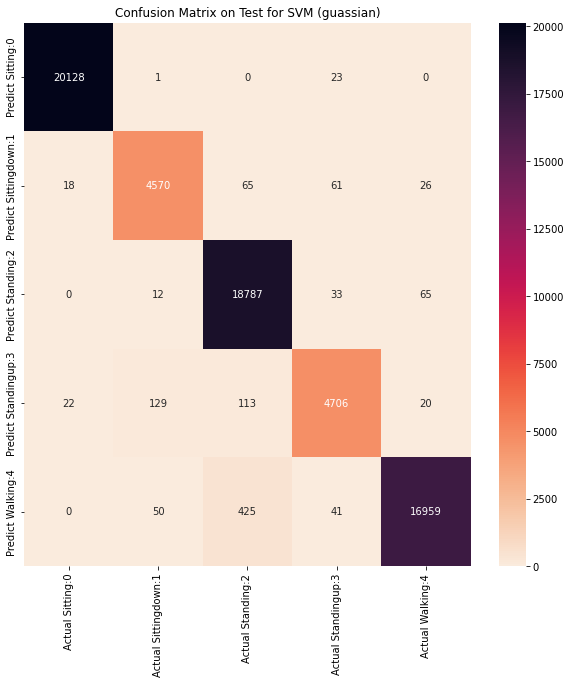

In [160]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix on Test for SVM (guassian)")
cm_matrix = pd.DataFrame(data=y_test_cnf_matrix, columns=['Actual Sitting:0', 'Actual Sittingdown:1', 'Actual Standing:2', 'Actual Standingup:3', 'Actual Walking:4'], 
                                 index=['Predict Sitting:0', 'Predict Sittingdown:1', 'Predict Standing:2', 'Predict Standingup:3', 'Predict Walking:4'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')

### Kernel: poly (degree = 3) 

In [119]:
svm_poly = SVC(kernel ='poly', degree = 3, random_state = 42, C=1.0)

In [120]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [121]:
y_train_pred = svm_poly.predict(X_train)

In [122]:
y_train_acc = metrics.accuracy_score(y_train, y_train_pred)
y_train_pre = metrics.precision_score(y_train, y_train_pred, average='weighted')
y_train_rec = metrics.recall_score(y_train, y_train_pred, average='weighted')

In [123]:
print('SVM (poly) Accuracy on train dataset:', y_train_acc)
print('SVM (poly) Precision on train dataset:', y_train_pre)
print('SVM (poly) Recall on train dataset:', y_train_rec)

SVM (poly) Accuracy on train dataset: 0.9747330925044526
SVM (poly) Precision on train dataset: 0.9754997811625453
SVM (poly) Recall on train dataset: 0.9747330925044526


#### Testing

In [96]:
y_test_preds = svm_poly.predict(X_test)

In [97]:
y_test_acc = metrics.accuracy_score(y_test, y_test_preds)
y_test_pre = metrics.precision_score(y_test, y_test_preds, average='weighted')
y_test_rec = metrics.recall_score(y_test, y_test_preds, average='weighted')
y_test_cnf_matrix = metrics.confusion_matrix(y_test, y_test_preds)

In [98]:
print('SVM (poly) Accuracy on test dataset:', y_test_acc)
print('SVM (poly) Precision on test dataset:', y_test_pre)
print('SVM (poly) Recall on test dataset:', y_test_rec)

SVM (poly) Accuracy on test dataset: 0.9731789778730341
SVM (poly) Precision on test dataset: 0.9739020239422639
SVM (poly) Recall on test dataset: 0.9731789778730341


<AxesSubplot: title={'center': 'Confusion Matrix on Test for SVM (poly)'}>

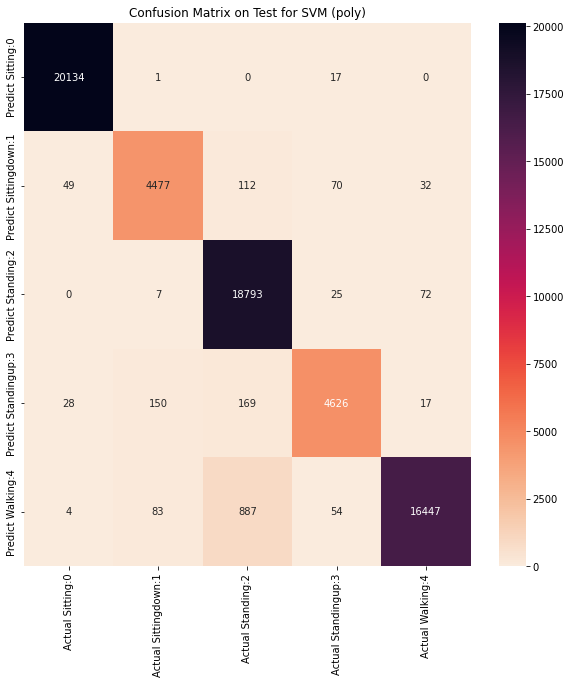

In [99]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix on Test for SVM (poly)")
cm_matrix = pd.DataFrame(data=y_test_cnf_matrix, columns=['Actual Sitting:0', 'Actual Sittingdown:1', 'Actual Standing:2', 'Actual Standingup:3', 'Actual Walking:4'], 
                                 index=['Predict Sitting:0', 'Predict Sittingdown:1', 'Predict Standing:2', 'Predict Standingup:3', 'Predict Walking:4'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')